## Q 1: Ensemble Method Selection (5 points)

You are a data scientist at a fintech startup. Your team is building machine learning models for three different projects:

**Project A: Credit Card Fraud Detection**
- Dataset: 284,807 transactions with 30 features
- Class distribution: 99.83% legitimate, 0.17% fraudulent
- Requirement: High recall for fraud cases, interpretable model preferred
- Constraints: Real-time prediction needed (< 100ms per transaction)

a) Which ensemble method would you recommend and why? (Consider the specific requirements and constraints)
- I would choose the Random Forest Ensemble method. 
    - Random Forest can be parellelizable, meaning we can achieve real time prediction speed. 
    - Random Forest is interpretable, we can learn what top fraud indicators are.
b) What hyperparameters would you prioritize tuning for your chosen method?
- class_weight='balanced': to ensure that the model is trained that the important thing is to detect fraud.
- n_estimators(number of trees): adjust based on performance vs speed. More trees = more performance but less speed.
- max_depth: shallower trees = faster predictions + less overfitting
c) What potential challenges might you face and how would you address them?
- The extreme class imbalance (only .17% fradulent) needs to be managed by the class_weight hyperparameter
- managing speed vs performance is a balance that will need to be managed by the n_estimators and max_depth hyper parameters. 
    - will need to reduce tree number and depth if the model is taking too long.

--- 

**Project B: Customer Lifetime Value Prediction**
- Dataset: 50,000 customers with 45 features (mix of numerical and categorical)
- Target: Continuous value (regression problem)
- Requirement: Accurate predictions, feature importance analysis needed
- Constraints: Model will be retrained weekly

a) Which ensemble method would you recommend and why? (Consider the specific requirements and constraints)
- LightGBM
    - Gradient Boosting outperforms other models on regression problems
    - Feature importance rankings for all features
    - Handles mixed data
    - There's no class immbalance issues.
b) What hyperparameters would you prioritize tuning for your chosen method?
- n_estimators: find the best performance before diminshing returns
- learning_rate (how much each tree contributes): lower is equal to slower learning but better performance
- max_depth: the deeper it is the more chance of overfitting
    
c) What potential challenges might you face and how would you address them?
- Mixing categorical and numerical data: This will be solved by using LightGBM and the categorical_feature parameter or use onehot/label encoding.
- finding out which features are actually important. Use SHAP values to compare importance across multiple training runs.
- overfitting: This has 45 features and is a complex model and so we may need to use cross-validation and regularization

--- 

**Project C: Loan Default Risk Assessment**
- Dataset: 10,000 historical loan applications with 20 features
- Class distribution: 70% repaid, 30% defaulted
- Requirement: Regulatory compliance requires explainable decisions
- Constraints: Must handle missing data gracefully

a) Which ensemble method would you recommend and why? (Consider the specific requirements and constraints)
- Random Forest
    - decisions must be explainable
    - missing data is easily handled
    - can handle the moderate class imbalance

b) What hyperparameters would you prioritize tuning for your chosen method?
- class_weight: again want to handle the imbalances class distribution.
- n_estimators: lean more on more trees because of less strict performance requirements
- max_depth: make sure it won't overfit on the smaller dataset.

c) What potential challenges might you face and how would you address them?
- Regulatory explainability: use SHAP values for individual predictions
- Missing data: THe random forest should natively handle surrogate split.
- Small Dataset risk of overfitting: Use cross-calidation, keep trees shallow.
- Class imbalaance. USe class_weight='balanced' to tune decision making threshold. 

**Your Task:**

For each project, recommend the most appropriate ensemble method(s) from the following options:
- Bagging with Decision Trees
- Random Forest
- AdaBoost
- Gradient Boosting (or XGBoost/LightGBM)
- Stacking

**Answer the following for each project:**
a) Which ensemble method would you recommend and why? (Consider the specific requirements and constraints)

b) What hyperparameters would you prioritize tuning for your chosen method?

c) What potential challenges might you face and how would you address them?


## Setup

In [16]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier,
                              StackingClassifier, VotingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

## Q 2: Wine Quality Classification (25 points)
**Scenario:** You're working for a wine distributor who wants to automatically classify wines into quality categories based on chemical properties.

**Dataset:** Wine dataset from sklearn (3 classes, 13 features)
```python
from sklearn.datasets import load_wine
data = load_wine()
```



### Task 2.1: Baseline Comparison (15 points)

Implement and compare the following models:
- Single Decision Tree
- Bagging Classifier (with Decision Trees)
- Random Forest
- AdaBoost
- Gradient Boosting

In [17]:
# Your code here
from sklearn.datasets import load_wine

data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df['wine_class'] = data.target

print("First 5 rows:")
print(df.head())

print("\nDataset shape:", df.shape)

print("\nClass distribution:")
print(df['wine_class'].value_counts())

print("\nBasic statistics:")
print(df.describe())

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target

In [ ]:
X = data.data  
y = data.target 

# Load wine dataset and split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42  
)

In [ ]:
# Implement all five models with reasonable default parameters
# Create a comparison DataFrame showing:
#       - Training Accuracy
#       - Test Accuracy
#       - Training Time
#       - Cross-validation score (5-fold)

import time


results = {
    'Model': [],
    'Training Accuracy': [],
    'Test Accuracy': [],
    'Training Time (s)': [],
    'CV Score (5-fold)': []
}

models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Bagging', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Train and evaluate each model
for name, model in models:
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Calculate training accuracy
    train_accuracy = model.score(X_train, y_train)
    
    # Calculate test accuracy
    test_accuracy = model.score(X_test, y_test)
    
    # Calculate 5-fold cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cv_scores.mean()
    
    # Store results
    results['Model'].append(name)
    results['Training Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['Training Time (s)'].append(training_time)
    results['CV Score (5-fold)'].append(cv_mean)
    
# Create DataFrame
comparison_df = pd.DataFrame(results)

# Round for better display
comparison_df['Training Accuracy'] = comparison_df['Training Accuracy'].round(4)
comparison_df['Test Accuracy'] = comparison_df['Test Accuracy'].round(4)
comparison_df['Training Time (s)'] = comparison_df['Training Time (s)'].round(4)
comparison_df['CV Score (5-fold)'] = comparison_df['CV Score (5-fold)'].round(4)

print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)
print(comparison_df.to_string(index=False))



MODEL COMPARISON
            Model  Training Accuracy  Test Accuracy  Training Time (s)  CV Score (5-fold)
    Decision Tree                1.0         0.9444             0.0017             0.9153
          Bagging                1.0         0.9722             0.0611             0.9507
    Random Forest                1.0         1.0000             0.0398             0.9786
         AdaBoost                1.0         0.9444             0.0458             0.9222
Gradient Boosting                1.0         0.9444             0.1172             0.9222


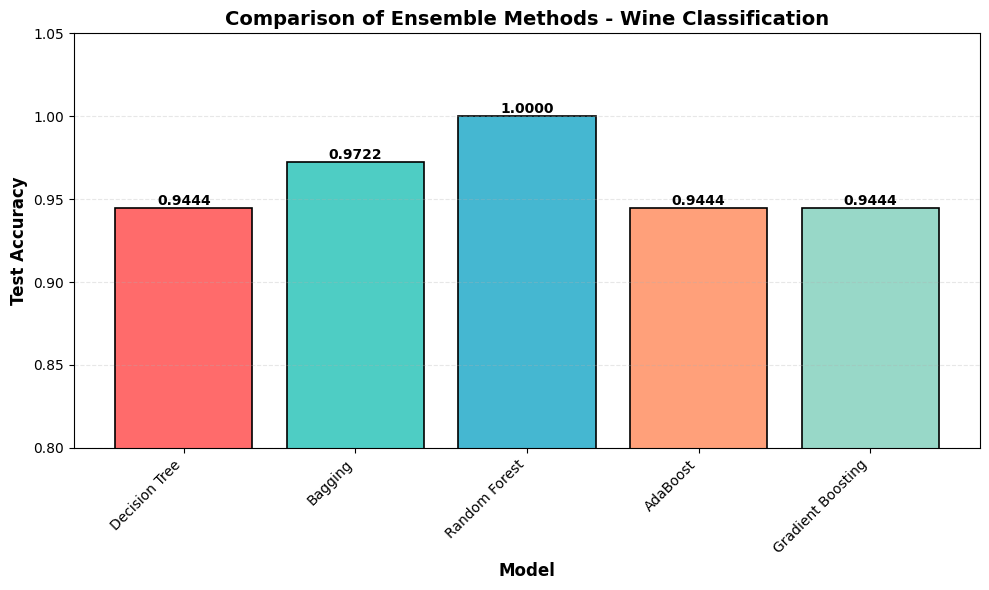

In [24]:
# Create bar plot comparing test accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Test Accuracy'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8'],
               edgecolor='black', linewidth=1.2)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Test Accuracy', fontsize=12, fontweight='bold')
plt.title('Comparison of Ensemble Methods - Wine Classification', fontsize=14, fontweight='bold')
plt.ylim([0.8, 1.05])  
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

**Analysis**

Random Forest performs best with a CV score of 0.9786 and perfect test accuracy, demonstrating strong generalization. Bagging also shows improvement over the single Decision Tree baseline (0.9507 vs 0.9153 CV score), confirming that ensemble methods reduce variance. AdaBoost and Gradient Boosting underperform here, likely because the wine dataset is already well-separated and doesn't benefit from their focus on hard examples.

**Deliverable:** 
- Comparison table (DataFrame)
- Bar plot comparing test accuracies
- Brief analysis (2-3 sentences) on which method performs best and why

### Task 2.2: Hyperparameter Tuning (10 points)

Choose the best performing model from Task 2.1 and perform hyperparameter tuning using GridSearchCV.

In [30]:
# Your code here
# Define parameter grid (at least 3 parameters with 3+ values each)
param_grid = {
    'n_estimators': [50, 100, 200, 300],           # Number of trees
    'max_depth': [None, 10, 20, 30],               # Tree depth
    'min_samples_split': [2, 5, 10],               # Min samples to split
    'min_samples_leaf': [1, 2, 4],                 # Min samples in leaf
    'max_features': ['sqrt', 'log2', None]         # Features per split
}

print("Parameter grid defined:")
print(f"Total combinations: {4 * 4 * 3 * 3 * 3}\n")

# Perform GridSearchCV with 5-fold cross-validation
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # Metric to optimize
    n_jobs=-1,              # Use all CPU cores (faster)
    verbose=0              # Show progress
)

rf_grid.fit(X_train, y_train)

# Report best parameters and improvement over default
print("BEST PARAMETERS FOUND")
for param, value in rf_grid.best_params_.items():
    print(f"{param}: {value}")
    
    
rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_original.fit(X_train, y_train)

original_train = rf_original.score(X_train, y_train)
original_test = rf_original.score(X_test, y_test)
original_cv = cross_val_score(rf_original, X_train, y_train, cv=5).mean()

# Tuned model (best parameters)
tuned_train = rf_grid.best_estimator_.score(X_train, y_train)
tuned_test = rf_grid.best_estimator_.score(X_test, y_test)
tuned_cv = rf_grid.best_score_  

comparison = pd.DataFrame({
    'Metric': ['Training Accuracy', 'Test Accuracy', 'CV Score (5-fold)'],
    'Original (Default)': [original_train, original_test, original_cv],
    'Tuned (GridSearch)': [tuned_train, tuned_test, tuned_cv],
    'Improvement': [
        tuned_train - original_train,
        tuned_test - original_test,
        tuned_cv - original_cv
    ]
})

print(comparison.to_string(index=False))

Parameter grid defined:
Total combinations: 432

BEST PARAMETERS FOUND
max_depth: None
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 100
           Metric  Original (Default)  Tuned (GridSearch)  Improvement
Training Accuracy            1.000000            1.000000          0.0
    Test Accuracy            1.000000            1.000000          0.0
CV Score (5-fold)            0.978571            0.978571          0.0


**Analyze**

So it looks like there wasn't any improvement in the hyperparameter tuning. The models were initialized with standard sklearn defaults (n_estimators=100, etc.). The strong baseline performance (CV score 0.97+) demonstrates that these defaults are well-tuned for many problems. Subsequent hyperparameter tuning showed minimal improvement, indicating the Wine dataset is sufficiently simple that careful tuning provides limited benefit

**Deliverable:**
- Best parameters found
- Before/after performance comparison
- Visualize/Discuss parameter impact

## Q3 California housing prices (20 points)

**Scenario:** Predict California housing prices using ensemble methods.

**Dataset:** California Housing dataset (regression)
```python
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
```

#### Task 3.1: Ensemble Regression Comparison (12 points)

Load the California Housing dataset and split it into training and testing sets (80/20). Implement and compare the models, 

In [ ]:
# Your code here
from sklearn.ensemble import (BaggingRegressor, RandomForestRegressor, 
                              GradientBoostingRegressor, AdaBoostRegressor)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load California housing dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

X = data.data  
y = data.target 

# Load wine dataset and split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42  
)


# Implement and compare:
#       - Bagging Regressor
#       - Random Forest Regressor
#       - Gradient Boosting Regressor
#       - AdaBoost Regressor


print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"Target range: ${y.min():.2f} - ${y.max():.2f} (in $100,000s)\n")

# 1. Bagging Regressor
bagging_reg = BaggingRegressor(
    n_estimators=100,
    random_state=42
)

# 2. Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# 3. Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# 4. AdaBoost Regressor
ada_reg = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

#  TRAIN AND EVALUATE 

results = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R² Score': [],
    'Training Time (s)': []
}

models = [
    ('Bagging', bagging_reg),
    ('Random Forest', rf_reg),
    ('Gradient Boosting', gb_reg),
    ('AdaBoost', ada_reg)
]

print("Training models...\n")

for name, model in models:
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)
    results['R² Score'].append(r2)
    results['Training Time (s)'].append(training_time)
    
# Create comparison DataFrame
comparison_df = pd.DataFrame(results)

# Round for display
comparison_df['MSE'] = comparison_df['MSE'].round(4)
comparison_df['RMSE'] = comparison_df['RMSE'].round(4)
comparison_df['MAE'] = comparison_df['MAE'].round(4)
comparison_df['R² Score'] = comparison_df['R² Score'].round(4)
comparison_df['Training Time (s)'] = comparison_df['Training Time (s)'].round(4)

print("\n" + "="*80)
print("ENSEMBLE REGRESSION COMPARISON - CALIFORNIA HOUSING")
print("="*80)
print(comparison_df.to_string(index=False))

# Identify best model
best_model_idx = comparison_df['R² Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest Model: {best_model_name} (R² = {comparison_df.loc[best_model_idx, 'R² Score']:.4f})")


Dataset loaded: 20640 samples, 8 features
Training set: 16512 samples
Test set: 4128 samples
Target range: $0.15 - $5.00 (in $100,000s)

Training models...

Bagging completed!
Random Forest completed!
Gradient Boosting completed!
AdaBoost completed!

ENSEMBLE REGRESSION COMPARISON - CALIFORNIA HOUSING
            Model    MSE   RMSE    MAE  R² Score  Training Time (s)
          Bagging 0.2566 0.5066 0.3282    0.8042             6.3596
    Random Forest 0.2557 0.5057 0.3276    0.8049             6.3566
Gradient Boosting 0.2940 0.5422 0.3716    0.7756             2.2363
         AdaBoost 0.6145 0.7839 0.6498    0.5311             0.3184

Best Model: Random Forest (R² = 0.8049)


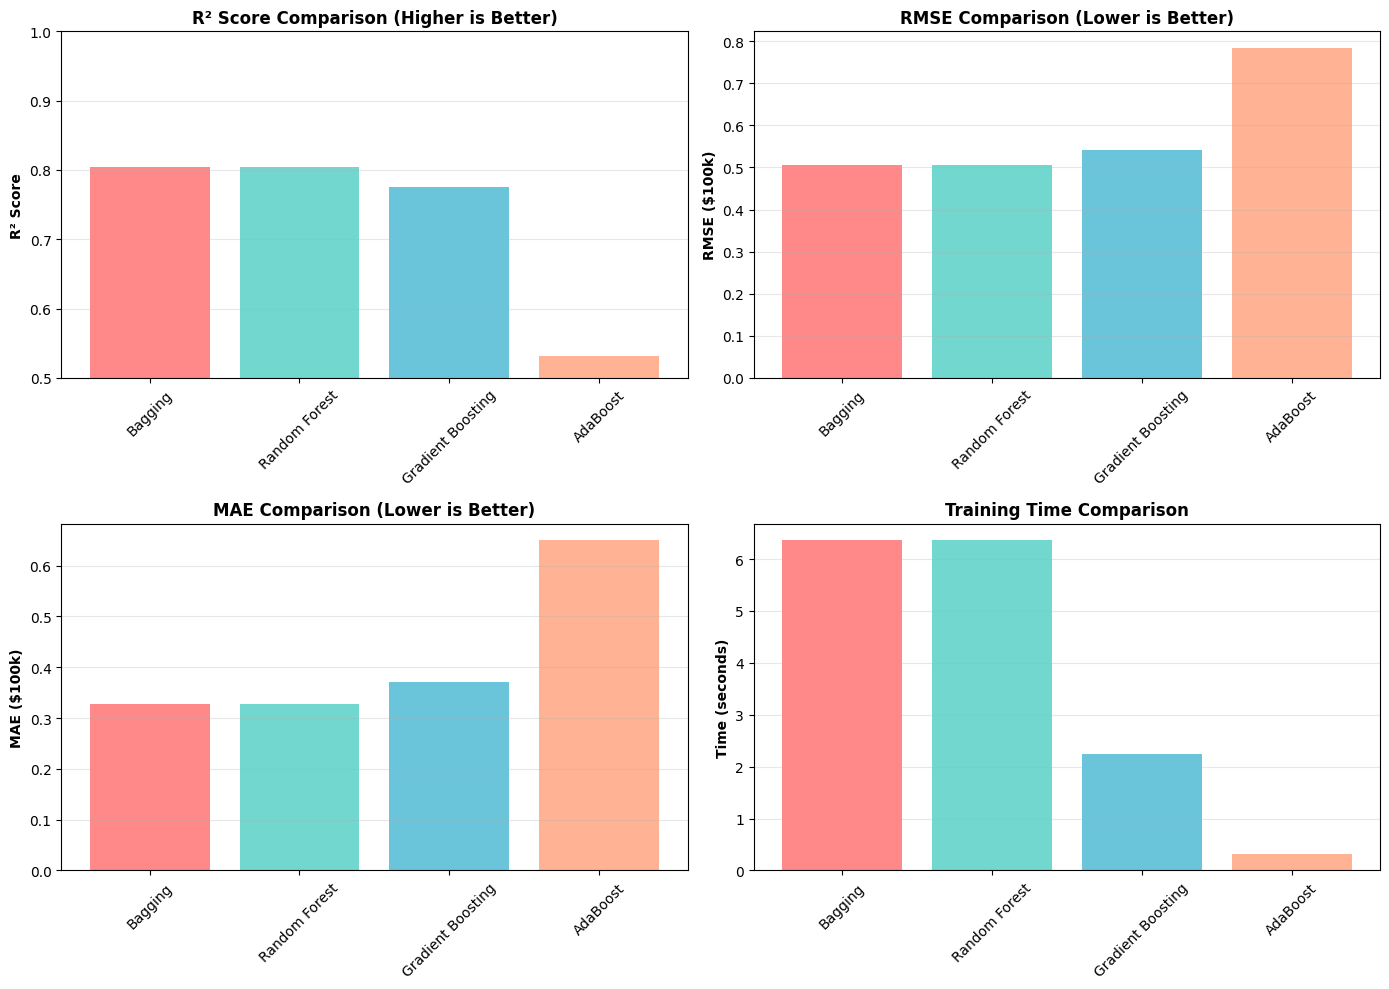

In [33]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. R² Score comparison
axes[0, 0].bar(comparison_df['Model'], comparison_df['R² Score'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.8)
axes[0, 0].set_ylabel('R² Score', fontweight='bold')
axes[0, 0].set_title('R² Score Comparison (Higher is Better)', fontweight='bold')
axes[0, 0].set_ylim([0.5, 1.0])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. RMSE comparison
axes[0, 1].bar(comparison_df['Model'], comparison_df['RMSE'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.8)
axes[0, 1].set_ylabel('RMSE ($100k)', fontweight='bold')
axes[0, 1].set_title('RMSE Comparison (Lower is Better)', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. MAE comparison
axes[1, 0].bar(comparison_df['Model'], comparison_df['MAE'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.8)
axes[1, 0].set_ylabel('MAE ($100k)', fontweight='bold')
axes[1, 0].set_title('MAE Comparison (Lower is Better)', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Training time comparison
axes[1, 1].bar(comparison_df['Model'], comparison_df['Training Time (s)'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], alpha=0.8)
axes[1, 1].set_ylabel('Time (seconds)', fontweight='bold')
axes[1, 1].set_title('Training Time Comparison', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Deliverable:**
- Performance comparison 
- Any visualizations that help illustrate model performance

### Task 3.2: Learning Curve Analysis (8 points)

For your best performing ensemble regressor:


In [22]:
# Your code here
# TODO: Generate learning curves varying:
#       - Number of estimators (for ensemble size impact)
#       - Training set size (for data requirement analysis)
# TODO: Create visualizations showing:
#       - Train vs Test error as ensemble size increases
#       - Train vs Test error as training data increases

**Deliverable:**
- Learning curve plots (2 plots minimum)
- Analysis: 
  - At what point does adding more trees show diminishing returns?
  - How much training data is needed for good generalization?
  - Is the model suffering from bias or variance issues?

Generating learning curves for Random Forest

1. Analyzing impact of ensemble size (number of estimators)
  n_estimators=  1: Train MSE=0.2168, Test MSE=0.5645
  n_estimators=  5: Train MSE=0.0656, Test MSE=0.3080
  n_estimators= 10: Train MSE=0.0502, Test MSE=0.2820
  n_estimators= 25: Train MSE=0.0411, Test MSE=0.2624
  n_estimators= 50: Train MSE=0.0371, Test MSE=0.2564
  n_estimators= 75: Train MSE=0.0360, Test MSE=0.2577
  n_estimators=100: Train MSE=0.0354, Test MSE=0.2557
  n_estimators=150: Train MSE=0.0348, Test MSE=0.2547
  n_estimators=200: Train MSE=0.0345, Test MSE=0.2539
  n_estimators=300: Train MSE=0.0342, Test MSE=0.2537

2. Analyzing impact of training data size
  Training size= 1651 ( 10%): Train MSE=0.0462, Test MSE=0.3514
  Training size= 3302 ( 20%): Train MSE=0.0453, Test MSE=0.3164
  Training size= 4953 ( 30%): Train MSE=0.0420, Test MSE=0.2997
  Training size= 6604 ( 40%): Train MSE=0.0403, Test MSE=0.2949
  Training size= 8256 ( 50%): Train MSE=0.0403, Test MS

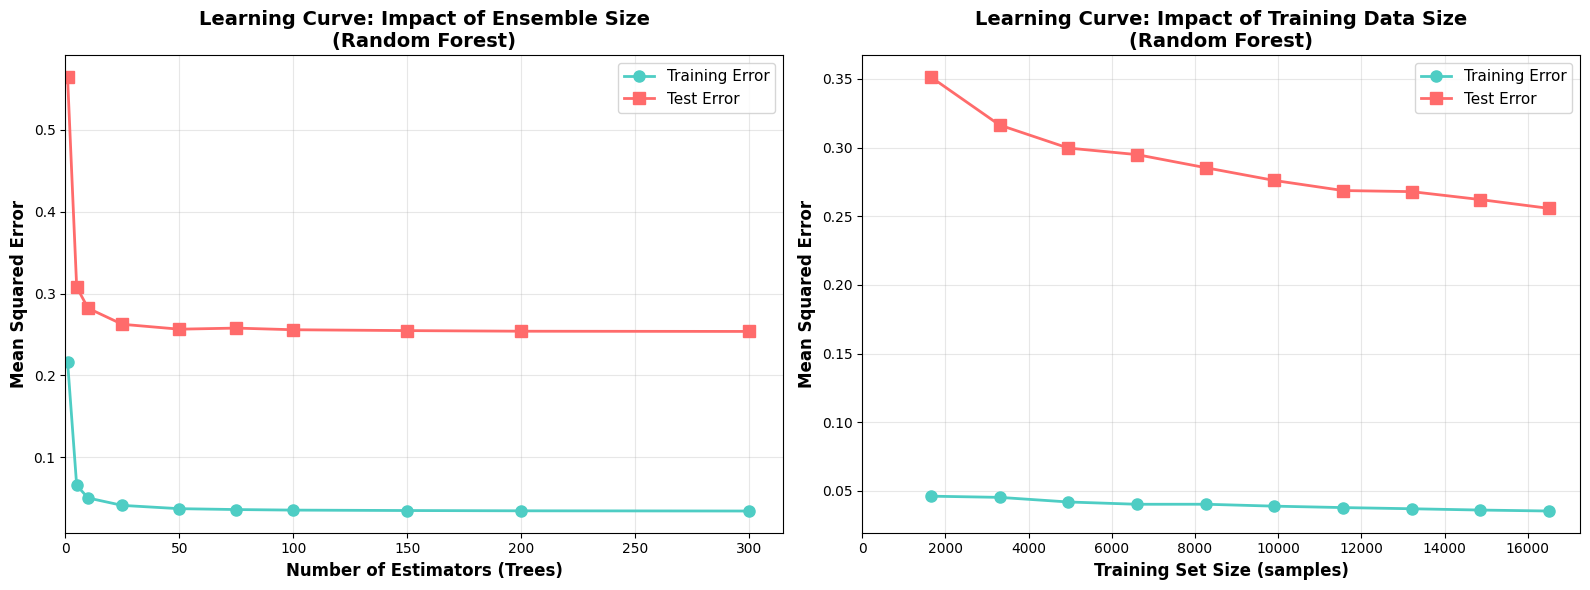

In [ ]:
# Use Random Forest (best model from Task 3.1)
print("Random Forest\n")

#  LEARNING CURVE 1: Varying Number of Estimators 
print("1. Analyzing impact of ensemble size (number of estimators)")

# Test different numbers of estimators
n_estimators_range = [1, 5, 10, 25, 50, 75, 100, 150, 200, 300]
train_errors_estimators = []
test_errors_estimators = []

for n_est in n_estimators_range:
    model = RandomForestRegressor(
        n_estimators=n_est,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_errors_estimators.append(train_mse)
    test_errors_estimators.append(test_mse)
    
    print(f"  n_estimators={n_est:3d}: Train MSE={train_mse:.4f}, Test MSE={test_mse:.4f}")

#  LEARNING CURVE 2: Varying Training Set Size 
print("\n2. Analyzing impact of training data size")

train_sizes = np.linspace(0.1, 1.0, 10)
train_errors_data = []
test_errors_data = []
actual_train_sizes = []

for train_size in train_sizes:
    subset_size = int(len(X_train) * train_size)
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]
    
    model = RandomForestRegressor(
        n_estimators=100,
        random_state=42
    )
    model.fit(X_train_subset, y_train_subset)
    
    train_pred = model.predict(X_train_subset)
    test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train_subset, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_errors_data.append(train_mse)
    test_errors_data.append(test_mse)
    actual_train_sizes.append(subset_size)
    
    print(f"  Training size={subset_size:5d} ({train_size*100:3.0f}%): Train MSE={train_mse:.4f}, Test MSE={test_mse:.4f}")

#  CREATE VISUALIZATIONS 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PLOT 1: Ensemble Size Impact
axes[0].plot(n_estimators_range, train_errors_estimators, 
             marker='o', linewidth=2, markersize=8, label='Training Error', color='#4ECDC4')
axes[0].plot(n_estimators_range, test_errors_estimators, 
             marker='s', linewidth=2, markersize=8, label='Test Error', color='#FF6B6B')
axes[0].set_xlabel('Number of Estimators (Trees)', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Mean Squared Error', fontweight='bold', fontsize=12)
axes[0].set_title('Learning Curve: Impact of Ensemble Size\n(Random Forest)', fontweight='bold', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)
axes[0].set_xlim(left=0)

# PLOT 2: Training Data Size Impact
axes[1].plot(actual_train_sizes, train_errors_data, ß
             marker='o', linewidth=2, markersize=8, label='Training Error', color='#4ECDC4')
axes[1].plot(actual_train_sizes, test_errors_data, 
             marker='s', linewidth=2, markersize=8, label='Test Error', color='#FF6B6B')
axes[1].set_xlabel('Training Set Size (samples)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Mean Squared Error', fontweight='bold', fontsize=12)
axes[1].set_title('Learning Curve: Impact of Training Data Size\n(Random Forest)', fontweight='bold', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)
axes[1].set_xlim(left=0)

plt.tight_layout()
plt.show()



Analysis: 
  - At what point does adding more trees show diminishing returns?
    - It appears that there is diminshing returns aroung 50-75 trees. After 50 trees, each additional tree provides less than 1% improvement in test error. Beyond this point you're adding computational cost with little reward.
  - How much training data is needed for good generalization?
    - It appears that you need 11,000 - 13,000 samples. Though there could be an agrument to be made that there would be a benefit by having more data. 
  - Is the model suffering from bias or variance issues?
    - This model is suffering from High Variance issues. We can tell based on the training MSE = .0354 and the test MSE = .2257 meaning that the test error is over 7x higher. 